In [34]:
import open3d as o3d
import numpy as np
import math
import matplotlib.pyplot  as plt
import pandas as pd


In [35]:
mesh = o3d.io.read_triangle_mesh("./resampled3/Bottle/D00020.obj")

In [36]:
''' 
1. Surface Area
2. Compactness
3. 3D rectangularity
4. Diameter
5. Convexity
6. Eccentricity

A3: Angle between 3 random vertices
D1: Distance between barycenter and random vertex
D2: Distance between 2 random vertices
D3: Square root of area of triangle given 3 random vertices
D4: cube root of volume of tetrahedron formed by 4 random vertices
'''

' \n1. Surface Area\n2. Compactness\n3. 3D rectangularity\n4. Diameter\n5. Convexity\n6. Eccentricity\n\nA3: Angle between 3 random vertices\nD1: Distance between barycenter and random vertex\nD2: Distance between 2 random vertices\nD3: Square root of area of triangle given 3 random vertices\nD4: cube root of volume of tetrahedron formed by 4 random vertices\n'

In [37]:
# Volume
Vmesh = mesh
pcd = Vmesh.sample_points_poisson_disk(10000)

def reconstruct(a):
    try:
        Vmesh = o3d.geometry.TriangleMesh.create_from_point_cloud_alpha_shape(pcd, a)
        Vmesh.compute_vertex_normals()
        V = Vmesh.get_volume()
        return V
    except:
        return None

V = None
alpha = 0.1
while V == None:
    V = reconstruct(alpha)
    alpha += 0.02

V

[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh
[Open3D WARNING] [CreateFromPointCloudAlphaShape] invalid tetra in TetraMesh

0.03502867676691303

In [38]:
# 1. Surface Area
S = mesh.get_surface_area()

S

0.6831987949115752

In [39]:
# 2. Compactness
c = S**3 / (36 * math.pi * V**2 )
c

2.297954565797364

In [40]:
# 3. 3D rectangularity
obb = mesh.get_oriented_bounding_box()
Vobb = obb.volume()
R = V/Vobb

In [41]:
# 4. 3D Diameter
D = 0
verts = np.asarray(mesh.vertices)

for x1, y1, z1 in verts:
    for x2, y2, z2 in verts:
        currD = ((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)**0.5
        if D < currD:
            D = currD

D

1.0054848692214566

In [42]:
# 5. Convexity
CH = mesh.compute_convex_hull()
Vch = CH[0].get_volume()
C = V / Vch
C


0.9051984656297194

In [43]:
# 6. Eccentricity
cov = np.cov(verts.transpose())
eigenvalues, _ = np.linalg.eig(cov)
E =  min(eigenvalues) / max(eigenvalues)
E

0.03954283224463605

In [44]:
n = 100000
a3_sample = verts[np.random.randint(len(verts), size=(n, 3))]

a3_dist = []

for A, B, Cp in a3_sample:

    ab = A - B
    bc = Cp - B

    abVec = math.sqrt(sum(ab * ab))
    bcVec = math.sqrt(sum(bc * bc))

    try:        
        res = sum((ab / abVec) * (bc / bcVec))
        a3_dist.append(math.acos(res)*180.0/ math.pi)
    except:
        print("Failed:", A, B, Cp)

A3 = a3_dist

Failed: [ 0.176259 -0.010867 -0.071789] [-0.47986901  0.107809   -0.051901  ] [ 0.176259 -0.010867 -0.071789]
Failed: [-0.114631  0.121603  0.017225] [0.188232 0.042978 0.058424] [-0.114631  0.121603  0.017225]
Failed: [ 0.152639 -0.095199  0.020954] [ 0.248074 -0.058129  0.013855] [ 0.152639 -0.095199  0.020954]
Failed: [0.178672 0.031995 0.067661] [ 0.35306099 -0.032273    0.02623   ] [0.178672 0.031995 0.067661]


C:\Users\jelle\AppData\Local\Temp\ipykernel_28400\13391492.py:15: RuntimeWarning: invalid value encountered in divide
  res = sum((ab / abVec) * (bc / bcVec))


Failed: [ 0.126201  0.114274 -0.010883] [0.283041 0.031001 0.04195 ] [ 0.126201  0.114274 -0.010883]
Failed: [-0.44129401 -0.127986    0.011362  ] [ 0.35411701 -0.001948    0.040742  ] [-0.44129401 -0.127986    0.011362  ]
Failed: [ 0.17707101 -0.046455    0.057087  ] [0.078034 0.041472 0.118376] [ 0.17707101 -0.046455    0.057087  ]
Failed: [-0.020995 -0.104813  0.07295 ] [ 0.125337  0.020158 -0.113709] [-0.020995 -0.104813  0.07295 ]
Failed: [ 0.087517  0.121169 -0.016673] [-0.062682 -0.112834  0.060179] [ 0.087517  0.121169 -0.016673]
Failed: [0.39565301 0.040446   0.005902  ] [0.123334 0.117149 0.002144] [0.39565301 0.040446   0.005902  ]
Failed: [-0.38499701  0.120975   -0.008361  ] [0.25285801 0.011834   0.056696  ] [-0.38499701  0.120975   -0.008361  ]
Failed: [-0.359364  0.117337 -0.028597] [-0.508174  0.035585 -0.097875] [-0.359364  0.117337 -0.028597]
Failed: [ 0.081965 -0.098983 -0.076194] [-0.37499699  0.090455    0.086281  ] [ 0.081965 -0.098983 -0.076194]
Failed: [-0.4790

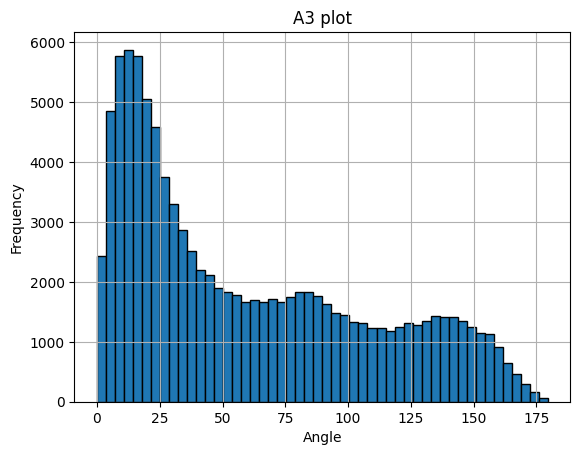

In [45]:
# Create a histogram
plt.hist(A3, bins=50, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.title('A3 plot')
plt.grid(True)

# Display the histogram
plt.show()

In [61]:

n = 100000
xb, yb, zb = np.mean(verts, axis=0)
d1_sample = verts[np.random.randint(len(verts), size=(n))]

d1_dist = []

for xs, ys, zs in d1_sample:
    d = ((xs - xb)**2 + (ys - yb)**2 + (zs - zb)**2)**0.5
    d1_dist.append(d)

D1 = d1_dist

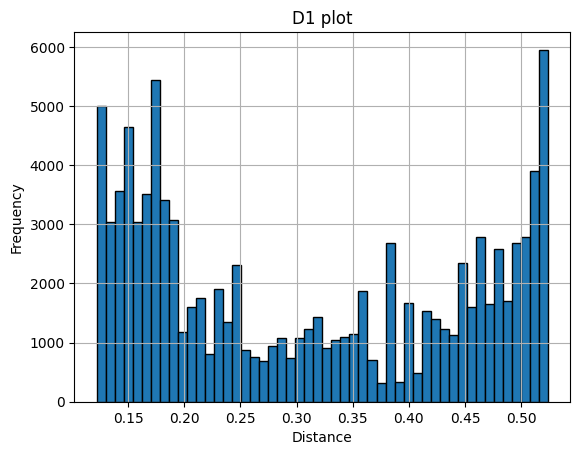

In [62]:
# Create a histogram
plt.hist(D1, bins=50, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('D1 plot')
plt.grid(True)

# Display the histogram
plt.show()

In [48]:
n = 100000
d2_sample1 = verts[np.random.randint(len(verts), size=(n))]
d2_sample2 = verts[np.random.randint(len(verts), size=(n))]


d2_dist = []

for i in range(n):
    xb, yb, zb = d2_sample1[i]
    xs, ys, zs = d2_sample2[i]
    d = ((xs - xb)**2 + (ys - yb)**2 + (zs - zb)**2)**0.5
    d2_dist.append(d)

D2 = d2_dist

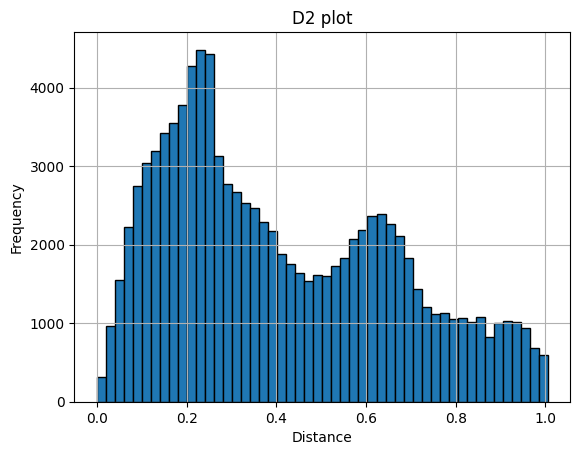

In [49]:
# Create a histogram
plt.hist(D2, bins=50, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('D2 plot')
plt.grid(True)

# Display the histogram
plt.show()

In [50]:
n = 100000
d3_sample1 = verts[np.random.randint(len(verts), size=(n))]
d3_sample2 = verts[np.random.randint(len(verts), size=(n))]
d3_sample3 = verts[np.random.randint(len(verts), size=(n))]


d3_dist = []

for i in range(n):
    A = d3_sample1[i]
    B = d3_sample2[i]
    Cp = d3_sample3[i]

    Xab, Yab, Zab = A - B
    Xac, Yac, Zac = A - Cp

    d = ((Yab * Zac - Zab * Yac)**2 + (Zab * Xac - Xab * Zac)**2 + (Xab * Yac - Yab * Xac)**2)**0.5
    d3_dist.append(d)

D3 = np.sqrt(d3_dist)


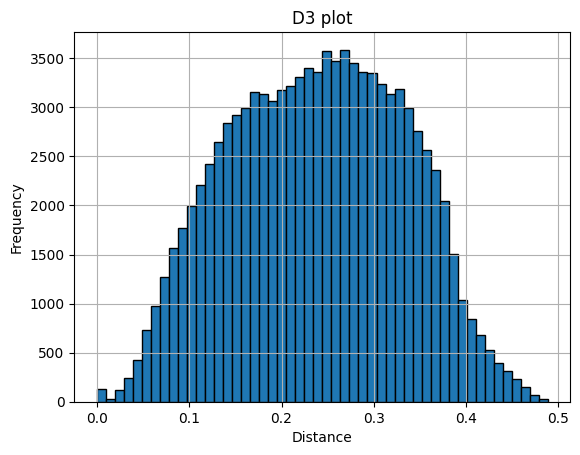

In [51]:
# Create a histogram
plt.hist(D3, bins=50, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('D3 plot')
plt.grid(True)

# Display the histogram
plt.show()

In [106]:
n = 100000
d4_sample1 = verts[np.random.randint(len(verts), size=n)]
d4_sample2 = verts[np.random.randint(len(verts), size=(n))]
d4_sample3 = verts[np.random.randint(len(verts), size=(n))]
d4_sample4 = verts[np.random.randint(len(verts), size=(n))]

d4_dist = []

def determinant_3x3(m):
    return (m[0][0] * (m[1][1] * m[2][2] - m[1][2] * m[2][1]) -
            m[1][0] * (m[0][1] * m[2][2] - m[0][2] * m[2][1]) +
            m[2][0] * (m[0][1] * m[1][2] - m[0][2] * m[1][1]))

for i in range(n):
    A = d4_sample1[i]
    B = d4_sample2[i]
    Cp = d4_sample3[i]
    Dp = d4_sample4[i]

    ab = A - B
    ac = A - Cp
    ad = A - Dp

    d = abs(determinant_3x3((ab,ac,ad)) / 6)
    d4_dist.append(d)

D4 = np.cbrt(d4_dist)

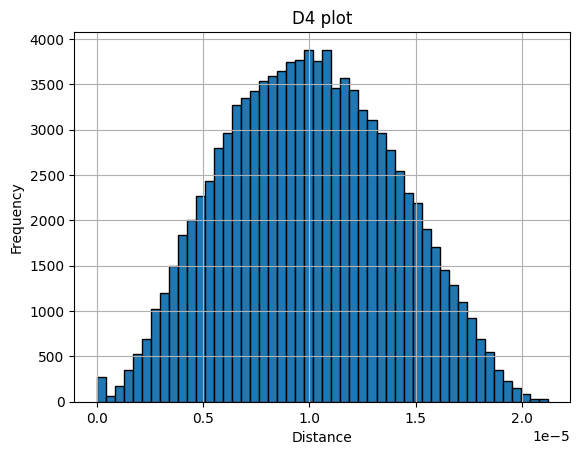

In [107]:

D4 = D4 / sum(D4)

# Create a histogram
plt.hist(D4, bins=50, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('D4 plot')
plt.grid(True)

# Display the histogram
plt.show()

In [54]:
# Detect
triangles = np.asarray(mesh.triangles)
triangles = np.delete(triangles, [10, 16, 26, 27], axis=0)
edges = []
for t1, t2, t3 in triangles:
    v1 = [t1, t2]
    v2 = [t2, t3]
    v3 = [t3, t1]

    v1.sort()
    v2.sort()
    v3.sort()

    if (v1 in edges):
        edges.remove(v1)
    else:
        edges.append(v1)
    
    if (v2 in edges):
        edges.remove(v2)
    else:
        edges.append(v2)

    if (v3 in edges):
        edges.remove(v3)
    else:
        edges.append(v3)

# Get Boundrys
bounds = []
while len(edges) > 0:
    bound = [edges[0]]
    edges.remove(edges[0])
    added = True
    while added:
        added = False
        for b in bound:
            for e in edges:
                if b[0] == e[0] or b[1] == e[0] or b[0] == e[1] or b[1] == e[1]:
                    edges.remove(e)
                    bound.append(e)
                    added = True
        
    bounds.append(bound)

# Get vertices
vertices = np.asarray(mesh.vertices)
bounds_verts = []
bounds_vertsi = []
for bound in bounds:
    bound_verts = []
    added = []
    for b1, b2 in bound:
        if b1 not in added:
            bound_verts.append(vertices[b1])
            added.append(b1)
        
        if b2 not in added:
            bound_verts.append(vertices[b2])
            added.append(b2)
    
    bounds_vertsi.append(added)
    bounds_verts.append(bound_verts)

# Create fans
new_vertices = np.copy(vertices)
new_triangles = np.copy(triangles)

for i in range(len(bounds)):
    barycenter = np.mean(bounds_verts[i], axis=0)
    bcenter = len(new_vertices)
    new_vertices = np.vstack([new_vertices, barycenter])
    for e1, e2 in bounds[i]:
        new_triangles = np.vstack([new_triangles, [e1, e2, bcenter]])

In [55]:
Surf = 0
Volu = 0

def determinant_3x3(m):
    return (m[0][0] * (m[1][1] * m[2][2] - m[1][2] * m[2][1]) -
            m[1][0] * (m[0][1] * m[2][2] - m[0][2] * m[2][1]) +
            m[2][0] * (m[0][1] * m[1][2] - m[0][2] * m[1][1]))

for t in new_triangles:
    a, b, c = new_vertices[t]
    o = np.mean(new_vertices, axis=0)
    Xab, Yab, Zab = a - b
    Xac, Yac, Zac = a - c

    Surf += (((Yab * Zac - Zab * Yac)**2 + (Zab * Xac - Xab * Zac)**2 + (Xab * Yac - Yab * Xac)**2)**0.5) / 2

    ab = a - o
    ac = b - o
    ad = c - o

    Volu += determinant_3x3((ab,ac,ad)) / 6

print(Surf, Volu)


0.6831987891496131 0.03478782490029207


In [56]:
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)

Surf = 0
Volu = 0

for t in triangles:
    a, b, c = vertices[t]
    o = np.mean(vertices, axis=0)
    Xab, Yab, Zab = a - b
    Xac, Yac, Zac = a - c

    Surf += (((Yab * Zac - Zab * Yac)**2 + (Zab * Xac - Xab * Zac)**2 + (Xab * Yac - Yab * Xac)**2)**0.5) / 2

    ab = a - o
    ac = b - o
    ad = c - o

    Volu += determinant_3x3((ab,ac,ad)) / 6

print(Surf, Volu)


0.6831987949115752 0.03477353758650084


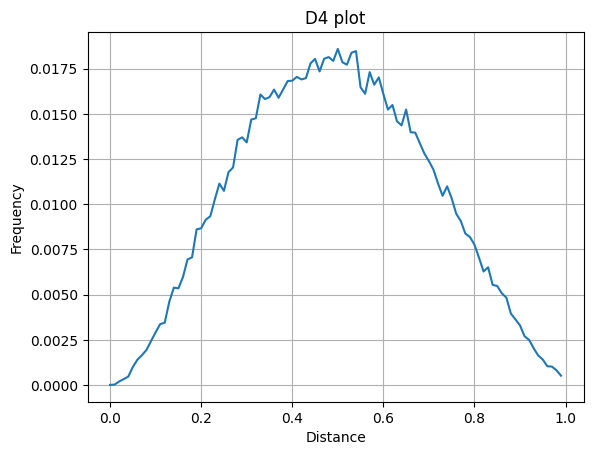

array([0.72465268, 0.20838353, 0.44478836, ..., 0.54153893, 0.13807509,
       0.76815366])

In [123]:
# Normalizing Histogram

data = D4 * 50000
max_val = 1
bins = 100

step = max_val / bins

curr_step = 0
norm_hist = []

for i in range(bins):
    count = 0
    for d in data:
        if d > curr_step and d < (curr_step + step):
            count += 1
    norm_hist.append(count)
    curr_step += step

norm_hist = np.asarray(norm_hist) / sum(norm_hist)


plt.plot(np.asarray(range(bins)) / bins, norm_hist)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('D4 plot')
plt.grid(True)

# Display the histogram
plt.show()

data